### NCAA Supervised Learning ###

In [11]:
import os
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier as DT
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from preprocessing_utils import *

In [2]:
shuffle_games(datasets_dir='~/Documents/cs7641')

In [3]:
dataset = get_game_data(relative=True, datasets_dir='~/Documents/cs7641')

                      Team1 ID          Team2 ID         Round  Round Num  \
0    East Tennessee State/2010     Kentucky/2010   Round of 64          1   
1                   Texas/2010  Wake Forest/2010   Round of 64          1   
2                  Temple/2010      Cornell/2010   Round of 64          1   
3                 Wofford/2010    Wisconsin/2010   Round of 64          1   
4              Washington/2010    Marquette/2010   Round of 64          1   
..                         ...               ...           ...        ...   
562                  Duke/2018     Syracuse/2018      Sweet 16          3   
563                  Duke/2018       Kansas/2018       Elite 8          4   
564        Loyola-Chicago/2018     Michigan/2018       Final 4          5   
565             Villanova/2018       Kansas/2018       Final 4          5   
566              Michigan/2018    Villanova/2018  Championship          6   

    Team1 result  Year  Game Num  W-L% Diff  SOS Diff  ORtg Diff  ...  \
0 

In [4]:
output = dataset['Team1 result']
label = sklearn.preprocessing.LabelEncoder()
output = label.fit_transform(output)

In [5]:
dataset = dataset.loc[:, dataset.columns.str.contains('Norm')]
dataset = dataset.drop(['Seed Norm Diff'], axis=1)
print(dataset)

     W-L% Norm Diff  SOS Norm Diff  ORtg Norm Diff  DRtg Norm Diff  \
0         -1.613043      -0.792023       -0.992063       -0.391076   
1          0.416377      -0.092479        0.694517        0.184744   
2         -0.076894       0.547085       -0.735043        0.614183   
3          0.077640      -0.989772       -0.386843        0.072451   
4          0.482289      -0.047339       -0.198737        0.302416   
..              ...            ...             ...             ...   
562        0.625587      -0.018975        1.821055        0.000000   
563       -0.031832      -0.125173        0.206388        0.479567   
564        0.097423      -0.629613       -0.292745        0.044765   
565        0.260264      -0.093035        0.397650        0.354606   
566       -0.232558      -0.050988       -0.755011        0.339188   

     FG% Norm Diff  WL% * SOS Norm Diff  3P% Norm Diff  FT% Norm Diff  \
0        -0.978743            -0.899400      -1.393613      -0.211531   
1         0.7

In [38]:
pca = PCA(n_components=11)
pca.fit(dataset)
print(np.sum(pca.explained_variance_ratio_))
x = pca.transform(dataset)

0.9932640185087411


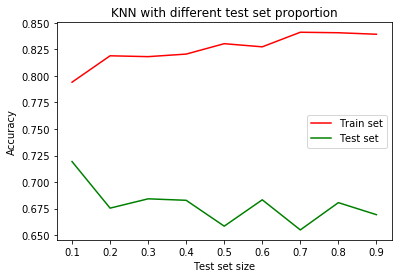

In [39]:
train_score = []
test_score = []
prop_score = []

for prop in range(1, 10):
    test_prop = prop / 10.0
    seeding = 10
    train_in, test_in, train_out, test_out = model_selection.train_test_split(x,
                                                                              output,
                                                                              test_size=test_prop,
                                                                              random_state=seeding)

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(train_in, train_out)
    train_score.append(knn.score(train_in, train_out))
    test_score.append(knn.score(test_in, test_out))
    prop_score.append(test_prop)

plt.plot(prop_score, train_score, 'r', label='Train set')
plt.plot(prop_score, test_score, 'g', label='Test set')
plt.title('KNN with different test set proportion')
plt.xlabel('Test set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

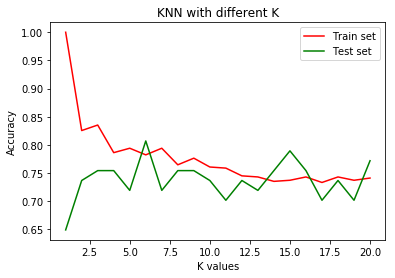

In [40]:
# Test for KNN with different K values
k_values = []
train_score = []
test_score = []
test_prop = 0.1
seeding = 10
train_in, test_in, train_out, test_out = model_selection.train_test_split(x,
                                                                          output,
                                                                          test_size=test_prop,
                                                                          random_state=seeding)
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_in, train_out)
    # print('knn result with k = {}:'.format(i))
    # print(knn.score(train_in, train_out))
    # print(knn.score(test_in, test_out))
    k_values.append(i)
    train_score.append(knn.score(train_in, train_out))
    test_score.append(knn.score(test_in, test_out))
plt.plot(k_values, train_score, 'r', label='Train set')
plt.plot(k_values, test_score, 'g', label='Test set')
plt.title('KNN with different K')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

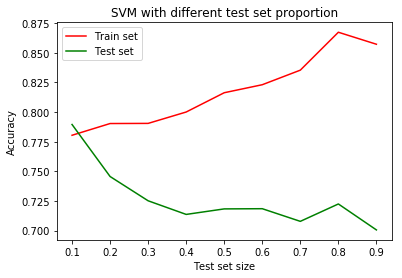

In [41]:
train_score = []
test_score = []
prop_score = []

for prop in range(1, 10):
    test_prop = prop / 10.0
    seeding = 10
    train_in, test_in, train_out, test_out = model_selection.train_test_split(x,
                                                                              output,
                                                                              test_size=test_prop,
                                                                              random_state=seeding)

    SVM_method = SVC(gamma='auto', kernel='rbf')    # kernel value can be changed into 'linear' or 'poly'
    SVM_method.fit(train_in, train_out)
    train_score.append(SVM_method.score(train_in, train_out))
    test_score.append(SVM_method.score(test_in, test_out))
    prop_score.append(test_prop)

plt.plot(prop_score, train_score, 'r', label='Train set')
plt.plot(prop_score, test_score, 'g', label='Test set')
plt.title('SVM with different test set proportion')
plt.xlabel('Test set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
